In [1]:
import sys,os
import pylab as py
import numpy as np
from scipy.optimize import leastsq
%matplotlib inline  

In [2]:
# simulate data
X=np.linspace(0.1,0.9,10)
Theory=0.5*X+0.1
ERR=0.05*Theory/Theory
Data = Theory + np.random.randn(Theory.size)*ERR

In [3]:
# Read in Old Faithful data
f = open('oldfaithful2.dat', 'r')
header1 = f.readline()
header2 = f.readline()
header3 = f.readline()
header4 = f.readline()

data_x = []
data_y = []
data_err = []

for line in f:
    lfine = line.strip()
    x,y,err = line.split()
    data_x.append(float(x))
    data_y.append(float(y))
    data_err.append(float(err))
    
X = np.array(data_x)
Data = np.array(data_y)
Err = np.array(data_err) * 1

print X,'\n',Data,'\n',Err

[ 1.5  2.   2.5  3.   3.5  4.   4.5  5. ] 
[ 50.  57.  65.  71.  76.  82.  89.  95.] 
[ 15.  16.  12.  17.   9.  13.  19.  21.]


chi2_npts =  0.00305873467875 chi2_dof = 0.004078312905 
pars =  [ 12.56685159  32.27160961] 
errors = [  5.07213736  16.75401978]
cov =
[[  25.7265774   -81.29977542]
 [ -81.29977542  280.69717878]]
cor =
[[ 1.        -0.9567078]
 [-0.9567078  1.       ]]
cov_gnuplot =
[[ 0.10492103 -0.33156592]
 [-0.33156592  1.14477093]]
err_gnuplot = [0.32391516269909637, 1.0699396836330051]


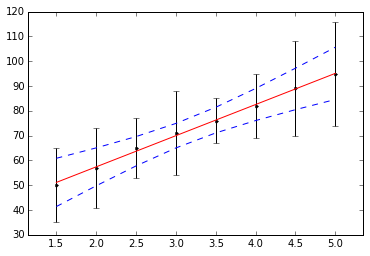

In [14]:
# # simulate data - Gaussian distribution around straight line, fixed std deviation
# X=np.linspace(0.1,0.9,10)
# Theory=0.5*X+0.1
# ERR=0.05*Theory/Theory
# Data = Theory + np.random.randn(Theory.size)*ERR

ERR = Err
#ERR = Data #*0.1

### fit data
model=lambda p,x:p[0]*x+p[1]  # define the model
res=lambda p:(Data-model(p,X))/ERR # define the residuals function (needed by 'leastsq')
fit=leastsq(res,np.ones(2),full_output = 1)
fitpar,cov,infodict,errmsg,ier = fit
# calculates chi^2, errors, cov and cor matrices
chi2 = (infodict['fvec']**2).sum()  # chi^2, various flavors
chi2_npts = chi2 / X.size 
chi2_dof = chi2 / (X.size-2) 
errpar = np.array([cov[i,i]**0.5 for i in [0,1]])  # error on parameters
dmat = np.asmatrix(np.diag(1/errpar))
covmat = np.asmatrix(cov)   # covariance matrix
cormat = dmat*covmat*dmat   # correlastion matrix

### model and uncertainty    
Y=model(fitpar,X)  # array with model evaluated at X
dY=np.array([(x,1) for x in X]).T   # array with model's gradient evaluated at X
sigmaY=np.einsum('ik,ij,jk->k',dY,cov,dY)**0.5  # model uncertainty array

### make plot
ax=py.subplot(111)
ax.errorbar(X,Data,yerr=ERR,fmt='k.')
ax.plot(X,model(fitpar,X),'r-')
ax.plot(X,model(fitpar,X)+sigmaY,'b--')
ax.plot(X,model(fitpar,X)-sigmaY,'b--')
delX = max(X)-min(X)
left = min(X)-0.1*delX
right = max(X)+0.1*delX
ax.set_xlim(left,right)
#ax.set_xlim(1,5.5)

### Print results of fit
print 'chi2_npts = ', chi2_npts, 'chi2_dof =', chi2_dof, '\npars = ', fitpar, '\nerrors =', errpar
print 'cov =\n', covmat
print 'cor =\n', cormat
#... Divide covariance and errors by chi^2/dof to obtain teh definition used by gnuplot
cov_adj = cov*chi2_dof
print 'cov_gnuplot =\n', cov_adj
print 'err_gnuplot =', [cov_adj[0,0]**0.5, cov_adj[1,1]**0.5]

#print np.average(sigmaY/Y)